# Etapa 1: Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
!pip install torch==1.4.0

     |████████████████████████████████| 753.4MB 19kB/s 
ERROR: torchvision 0.8.1+cu101 has requirement torch==1.7.0, but you'll have torch 1.4.0 which is incompatible.
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101


In [3]:
import torch
torch.__version__

'1.4.0'

In [4]:
import torch.nn as nn

# Etapa 2: Base de dados

In [5]:
np.random.seed(123)
torch.manual_seed(123)

In [6]:
previsores = pd.read_csv('/content/entradas_breast.csv')
classe = pd.read_csv('/content/saidas_breast.csv')

In [7]:
previsores.shape

(569, 30)

In [8]:
previsores.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1095.0000,0.9053,8589.0,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3398.0,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4585.0,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1156.0000,3445.0,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,0.05883,0.7572,0.7813,5438.0,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678


In [9]:
classe.head()

,0
0,0
1,0
2,0
3,0
4,0


In [10]:
np.unique(classe, return_counts=True)

(array([0, 1]), array([212, 357]))

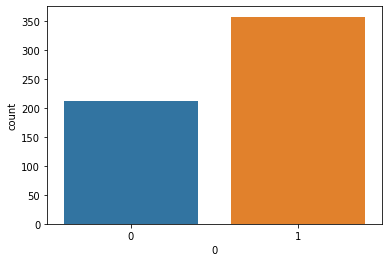

In [11]:
sns.countplot(x= '0', data=classe);

In [12]:
X_train, X_test, y_train, y_test = train_test_split(previsores, classe,
                                                    test_size=0.25)
X_train.shape, y_train.shape

((426, 30), (426, 1))

In [13]:
X_test.shape, y_test.shape

((143, 30), (143, 1))

# Etapa 3: Transformação dos dados para tensores

In [14]:
type(X_train)

pandas.core.frame.DataFrame

In [15]:
type(np.array(X_train))

numpy.ndarray

In [16]:
X_train = torch.tensor(np.array(X_train), dtype=torch.float)
y_train = torch.tensor(np.array(y_train), dtype=torch.float)

In [17]:
type(X_train), type(y_train)

(torch.Tensor, torch.Tensor)

In [18]:
dataset = torch.utils.data.TensorDataset(X_train, y_train)

In [19]:
type(dataset)

torch.utils.data.dataset.TensorDataset

In [20]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

# Etapa 4: Construção do modelo

In [21]:
# 30 -> 16 -> 16 -> 1
# (entradas + saída) / 2 = (30+1) / 2 = 16

classificador = nn.Sequential(
    nn.Linear(in_features=30, out_features=16),   # 30 -> 16
    nn.ReLU(),
    nn.Linear(16,16),                             # 16 -> 16
    nn.ReLU(),
    nn.Linear(16,1),                              # 16 -> 1
    nn.Sigmoid()
)

In [22]:
classificador.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [23]:
criterion = nn.BCELoss()

In [24]:
optimizer = torch.optim.Adam(classificador.parameters(), lr=0.001, weight_decay=0.0001)

# Etapa 5: Treinamento do modelo

In [25]:
for epoch in range(100):
  running_loss = 0.

  for data in train_loader:
    inputs, labels = data
    optimizer.zero_grad()
    outputs = classificador(inputs) # classificador.forward(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

  print(f'Epoch:%3d: perda %.5f' % (epoch + 1, running_loss/len(train_loader)))

Epoch:  1: perda 5.44077
Epoch:  2: perda 1.61572
Epoch:  3: perda 1.27111
Epoch:  4: perda 1.22527
Epoch:  5: perda 1.19481
Epoch:  6: perda 1.16310
Epoch:  7: perda 1.16480
Epoch:  8: perda 1.15068
Epoch:  9: perda 1.12336
Epoch: 10: perda 1.12424
Epoch: 11: perda 1.08099
Epoch: 12: perda 1.09893
Epoch: 13: perda 1.07530
Epoch: 14: perda 1.08443
Epoch: 15: perda 1.13997
Epoch: 16: perda 1.07494
Epoch: 17: perda 1.08882
Epoch: 18: perda 1.04306
Epoch: 19: perda 1.07964
Epoch: 20: perda 1.04321
Epoch: 21: perda 1.06220
Epoch: 22: perda 1.11282
Epoch: 23: perda 1.06123
Epoch: 24: perda 1.00314
Epoch: 25: perda 1.05587
Epoch: 26: perda 1.00042
Epoch: 27: perda 1.01152
Epoch: 28: perda 1.00167
Epoch: 29: perda 1.00211
Epoch: 30: perda 0.98924
Epoch: 31: perda 1.02455
Epoch: 32: perda 0.98739
Epoch: 33: perda 1.00291
Epoch: 34: perda 1.00912
Epoch: 35: perda 1.03670
Epoch: 36: perda 1.06181
Epoch: 37: perda 1.08788
Epoch: 38: perda 0.98346
Epoch: 39: perda 1.01909
Epoch: 40: perda 1.02930


# Etapa 6: Visualização dos pesos

In [26]:
# 30 -> 16 -> 16 -> 1
params = list(classificador.parameters())
params

[Parameter containing:
 tensor([[-6.1117e-02,  1.0842e-02, -8.3451e-02,  7.3670e-02, -1.4103e-04,
           7.1735e-03,  1.6724e-04,  3.0778e-04, -1.4554e-01,  2.3041e-05,
           7.6860e-04,  5.7891e-02, -1.7100e-01, -1.1286e-01, -1.7372e-05,
           9.2535e-05, -1.3769e-01,  2.1168e-05,  3.4194e-05, -4.3480e-06,
           1.1655e-01,  2.8734e-02,  4.9158e-02,  1.6877e-01, -1.0013e-01,
           3.5644e-02, -7.7274e-02,  1.0043e-01,  1.7117e-01, -1.2664e-01],
         [ 1.8897e-01,  7.7857e-02,  2.9895e-01,  1.2622e-01, -3.7438e-02,
          -4.1179e-02, -1.1583e-01, -1.0469e-01,  5.9242e-03,  5.7507e-02,
           2.8247e-02, -5.9924e-02, -3.0952e-02,  1.7770e-01, -1.7899e-02,
          -5.7413e-02,  2.0035e-01,  7.5741e-02,  3.3918e-01, -1.7641e-02,
           2.1964e-01, -5.0753e-02,  2.0365e-01,  3.5049e-02,  2.8228e-02,
          -1.8649e-01, -2.7290e-01,  1.7580e-01, -9.5777e-02, -2.6468e-01],
         [-2.8255e-02, -2.5968e-02, -2.4523e-02, -2.3394e-02,  2.4482e-03,


In [27]:
# 30 -> 16 -> 16 -> 1
pesos0 = params[0]
pesos0.shape

torch.Size([16, 30])

In [28]:
# 30 -> 16 -> 16 -> 1
bias0 = params[1]
bias0.shape

torch.Size([16])

In [29]:
# 30 -> 16 -> 16 -> 1
pesos1 = params[2]
pesos1.shape

torch.Size([16, 16])

In [30]:
# 30 -> 16 -> 16 -> 1
bias1 = params[3]
bias1.shape

torch.Size([16])

In [31]:
# 30 -> 16 -> 16 -> 1
pesos2 = params[4]
pesos2.shape

torch.Size([1, 16])

In [32]:
# 30 -> 16 -> 16 -> 1
bias2 = params[5]
bias2.shape

torch.Size([1])

# Etapa 7: Avaliação do modelo

In [33]:
classificador.eval()

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

In [34]:
type(X_test)

pandas.core.frame.DataFrame

In [35]:
X_test = torch.tensor(np.array(X_test), dtype=torch.float)
type(X_test)

torch.Tensor

In [36]:
previsoes = classificador.forward(X_test)

In [37]:
previsoes

tensor([[9.9513e-01],
        [1.0000e+00],
        [4.7650e-01],
        [1.0000e+00],
        [4.0390e-05],
        [9.5113e-01],
        [9.8119e-01],
        [9.9999e-01],
        [8.3207e-01],
        [2.5404e-01],
        [1.0000e+00],
        [9.7957e-01],
        [9.1944e-01],
        [9.9232e-01],
        [8.8875e-01],
        [9.6189e-01],
        [9.9218e-01],
        [1.0000e+00],
        [2.0592e-01],
        [9.9921e-01],
        [4.1809e-11],
        [6.5122e-03],
        [9.1510e-01],
        [1.0000e+00],
        [8.8206e-01],
        [7.9449e-04],
        [6.4811e-01],
        [1.0000e+00],
        [2.3643e-05],
        [9.9706e-01],
        [2.5161e-01],
        [1.0000e+00],
        [9.5667e-01],
        [9.6297e-01],
        [5.8473e-01],
        [9.9722e-01],
        [2.5094e-01],
        [9.9916e-01],
        [1.0000e+00],
        [5.0961e-06],
        [3.3133e-03],
        [9.9701e-01],
        [7.2742e-08],
        [5.8812e-01],
        [2.4005e-06],
        [9

In [38]:
previsoes = np.array(previsoes > 0.5)
previsoes

array([[ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [

In [39]:
taxa_acerto = accuracy_score(y_test, previsoes)
taxa_acerto

0.8741258741258742

In [40]:
matriz = confusion_matrix(y_test, previsoes)
matriz

array([[40, 14],
       [ 4, 85]])

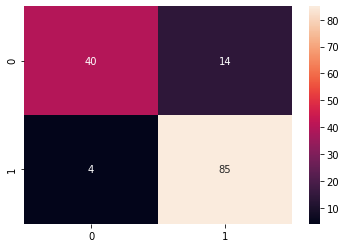

In [41]:
sns.heatmap(matriz, annot=True);